### ENTREGA FINAL DE PROYECTO DE OPEN DATA II - UNIVERSIDAD EUROPEA DE MADRID  

#### Nombres: Andés Porta Cardona y Miguel Moreno Toledano 

Para esta asignatura hemos seleccionado un conjunto de datasets de kaggle el cual adjuntaremos el enlace al final de este comentario, una vez tuvimos los csv, los examinamos para comprobar que tenia las mismas columnas y csvs al que habiamos trabajado el cuatrimestre pasado, debido a que para realizar este trabaajo hemos usado una version actualizada, donde estaban los datos hasta el año 2020. Despúes de haber leido los diferentes data sets, preparamos los datos para poder aplicar los algoritmos; este ha sido el punto donde mas tiempo hemos dedicado debido a la dificultad que supuso poder ordenar los csv, seleccionar las tablas que ibamos a emplear y hacer sus respectivos join, filtrar columnas y eliminar los ceros. Después de esto hemos seleccionado el conjutno de entrenamiento y de test  realizado dos transformaciones más, las cuales son el Normalizer y el PCA, para despues realizar tres algoritmos.

https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020?select=constructor_standings.csv

##  Establecemos el entorno de desarrollo

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import *
from pyspark import SparkContext

spark = SparkSession.builder.getOrCreate()

In [3]:
spark_context = spark.sparkContext

## Leemos los datos y entendemos el modelo de datos

In [4]:
circuitsDF = spark.read.format('csv') \
                 .option("inferSchema", "true") \
                 .option("delimiter", ",") \
                 .option('header','true') \
                 .load('./data/circuits.csv')

constructor_resultsDF = spark.read.format('csv') \
                            .option("inferSchema", "true") \
                            .option("delimiter", ",") \
                            .option('header','true') \
                            .load('./data/constructor_results.csv')

constructor_standingsDF = spark.read.format('csv') \
                            .option("inferSchema", "true") \
                            .option("delimiter", ",") \
                            .option('header','true') \
                            .load('./data/constructor_standings.csv')

constructorsDF = spark.read.format('csv') \
                    .option("inferSchema", "true") \
                    .option("delimiter", ",") \
                    .option('header','true') \
                    .load('./data/constructors.csv')

driver_standingsDF = spark.read.format('csv') \
                            .option("inferSchema", "true") \
                            .option("delimiter", ",") \
                            .option('header','true') \
                            .load('./data/driver_standings.csv')

driversDF = spark.read.format('csv') \
                .option("inferSchema", "true") \
                .option("delimiter", ",") \
                .option('header','true') \
                .load('./data/drivers.csv')

lap_timesDF = spark.read.format('csv') \
                .option("inferSchema", "true") \
                .option("delimiter", ",") \
                .option('header','true') \
                .load('./data/lap_times.csv')

pit_stopsDF = spark.read.format('csv') \
                .option("inferSchema", "true") \
                .option("delimiter", ",") \
                .option('header','true') \
                .load('./data/pit_stops.csv')

qualifyingDF = spark.read.format('csv') \
                    .option("inferSchema", "true") \
                    .option("delimiter", ",") \
                    .option('header','true') \
                    .load('./data/qualifying.csv')

racesDF = spark.read.format('csv') \
                .option("inferSchema", "true") \
                .option("delimiter", ",") \
                .option('header','true') \
                .load('./data/races.csv')

resultsDF = spark.read.format('csv') \
                .option("inferSchema", "true") \
                .option("delimiter", ",") \
                .option('header','true') \
                .load('./data/results.csv')

seasonsDF = spark.read.format('csv') \
                .option("inferSchema", "true") \
                .option("delimiter", ",") \
                .option('header','true') \
                .load('./data/seasons.csv')

statusDF = spark.read.format('csv') \
                .option("inferSchema", "true") \
                .option("delimiter", ",") \
                .option('header','true') \
                .load('./data/status.csv')

### Comprobamos que se ha leido bien

In [5]:
circuitsDF.toPandas().head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [6]:
circuitsDF.show()

+---------+--------------+--------------------+------------+---------+--------+---------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|      lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+---------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497|  144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083|  101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325|  50.5106|  7|http://en.wikiped...|
|        4|     catalunya|Circuit de Barcel...|    Montmeló|    Spain|   41.57|  2.26111|109|http://en.wikiped...|
|        5|      istanbul|       Istanbul Park|    Istanbul|   Turkey| 40.9517|   29.405|130|http://en.wikiped...|
|        6|        monaco|   Circuit de Monaco| Monte-Carlo|   Monaco| 43.7347| 

In [7]:
constructor_resultsDF.toPandas().head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [8]:
constructor_standingsDF.toPandas().head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


# Agregamos y preparamos los datos

In [9]:
from pyspark.sql.types import FloatType, StringType
from pyspark.sql.functions import *

def convert_to_secs(time): 
    if time:
        mins = time.split(':')[0]
        secs = time.split(':')[1].split('.')[0]
        millisecs = time.split(':')[1].split('.')[1]
        return int(mins) * 60 + int(secs) + int(millisecs) / 1000
    else:
        return 0

convert_to_secs_udf = udf(lambda time: convert_to_secs(time), FloatType())

In [10]:
#from pyspark.sql import functions as F
from pyspark.sql.functions import *

circuitsDF = circuitsDF.select(col("circuitid").alias("circuitId"),col("alt").alias("altitude"))
racesDF = racesDF.select(col("raceid").alias("raceId"), col("circuitid").alias("circuitId"),col("date"), col("time"), col("year"))
pit_stopsDF = pit_stopsDF.groupBy("raceid", "driverid").agg(count("stop").alias("pipstops"), avg("milliseconds").alias("meantimepitstop")).withColumnRenamed("raceid","raceId").withColumnRenamed("driverid","driverId")
lap_timesDF = lap_timesDF.groupBy("raceid", "driverid").agg(avg("milliseconds").alias("meantimelap")).withColumnRenamed("raceid","raceId").withColumnRenamed("driverid","driverId")
qualifyingDF = qualifyingDF.select(col("raceId"), col("driverId"), col("position").alias("gridposition"), col("q1"),col("q2"), col("q3")).fillna(0)
resultsDF = resultsDF.select(col("raceId"),col("driverId"), col("position").alias("raceposition"))

# Realizamos los join que son necesarios medainte el ientificador carrera, inner nos devulve la coincidencia, la interseccion
racesDF = racesDF.join(circuitsDF, on=["circuitId"], how="inner")
racesDF = racesDF.join(pit_stopsDF, on=["raceId"], how="inner")
racesDF = racesDF.join(lap_timesDF, on=["raceId", "driverId"], how="inner")
racesDF = racesDF.join(qualifyingDF, on=["raceId", "driverId"], how="inner")
racesDF = racesDF.join(resultsDF, on=["raceId", "driverId"], how="inner")

# Transformamos los datos 
#print(racesDF.printSchema())
racesDF = racesDF = racesDF.withColumn("q1", when(col("q1") == "\\N", "0:00.000").otherwise(col("q1")))
racesDF= racesDF.withColumn("q1", when(col("q1") == "", "0:00.000").otherwise(col("q1")))
racesDF = racesDF = racesDF.withColumn("q2", when(col("q2") == "\\N", "0:00.000").otherwise(col("q2")))
racesDF= racesDF.withColumn("q2", when(col("q2") == "", "0:00.000").otherwise(col("q2")))
racesDF = racesDF.withColumn("q3", when(col("q3") == "\\N", "0:00.000").otherwise(col("q3")))
racesDF= racesDF.withColumn("q3", when(col("q3") == "", "0:00.000").otherwise(col("q3")))
racesDF = racesDF.withColumn("raceposition", when(col("raceposition") == 1, col("raceposition")).otherwise(0))
racesDF = racesDF.withColumn("raceposition",racesDF.raceposition.cast('integer'))
racesDF = racesDF.fillna(value=0)

racesDF.na.fill(value="0:00.000", subset=["q1", "q2", "q3"])
racesDF = racesDF.withColumn("q1", convert_to_secs_udf("q1"))
racesDF = racesDF.withColumn("q2", convert_to_secs_udf("q2"))
racesDF = racesDF.withColumn("q3", convert_to_secs_udf("q3"))

# Pasamos a segundos 
racesDF= racesDF.withColumn("meantimepitstop", col("meantimepitstop") / 1000)
racesDF= racesDF.withColumn("meantimelap", col("meantimelap") / 1000)
split_date = split(racesDF["date"], '-')
racesDF = racesDF.withColumn("date", split_date.getItem(1).cast('float'))
split_time = split(racesDF["time"], ':')
racesDF = racesDF.withColumn("time", split_time.getItem(0).cast('float'))

racesDF.toPandas().head(10)

,raceId,driverId,circuitId,date,time,year,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition
0,841,815,1,3.0,6.0,2011,10,1,23.438000,93.725931,13,85.811996,86.108002,0.000000,0
1,841,808,1,3.0,6.0,2011,10,2,25.109000,93.117569,6,85.542999,85.582001,85.247002,0
2,841,4,1,3.0,6.0,2011,10,3,24.055000,93.138466,5,85.707001,85.241997,84.973999,0
3,841,18,1,3.0,6.0,2011,10,3,20.950333,93.526948,4,85.886002,84.957001,84.778999,0
4,841,155,1,3.0,6.0,2011,10,2,24.128000,93.916052,9,85.717003,85.404999,85.625999,0
5,841,20,1,3.0,6.0,2011,10,2,23.319500,92.590672,1,85.295998,84.089996,83.528999,1
6,841,3,1,3.0,6.0,2011,10,1,23.716000,96.448909,7,85.856003,85.606003,85.420998,0
7,841,17,1,3.0,6.0,2011,10,3,24.058667,93.248793,3,85.900002,84.657997,84.394997,0
8,841,814,1,3.0,6.0,2011,10,2,24.597500,95.153789,14,87.222000,86.738998,0.000000,0
9,841,816,1,3.0,6.0,2011,10,2,25.852500,99.528111,22,90.821999,0.000000,0.000000,0


## Dividimos el dataset en train y test

In [11]:
train = racesDF.filter(~racesDF.year.isin([2020]))
test = racesDF.filter(racesDF.year.isin([2020])) # Usamos para nuestro conjunto de test las carreras que se han realizado en el año 2020

## Quitamos columnas innecesarias y randomizamos registros

In [12]:
train = train.drop(*["raceId", "driverId", "year"]).orderBy(rand())
test = test.drop(*["raceId", "driverId", "year"]).orderBy(rand())

In [13]:
train.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition
0,3,4.0,15.0,7,2,25.430500,101.917375,11,95.450996,94.704002,0.000000,0
1,32,10.0,19.0,2227,1,23.755000,87.607184,13,76.241997,77.167000,NaN,0
2,11,8.0,13.0,264,2,21.434500,81.737029,1,75.817001,75.572998,74.571999,0
3,12,6.0,12.0,4,3,20.383667,105.323228,2,99.956001,98.057999,97.163002,0
4,32,10.0,19.0,2227,2,22.804000,86.657913,14,76.681999,77.183998,NaN,0


In [14]:
test.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition
0,71,9.0,11.0,2,2,30.161000,108.174038,10,93.918999,93.153000,93.008003,0
1,24,12.0,13.0,3,1,21.587000,105.538564,2,95.698997,95.527000,95.271004,0
2,3,12.0,17.0,7,3,26.618000,63.356000,20,55.425999,NaN,NaN,0
3,76,9.0,13.0,255,5,541.003400,142.662644,15,77.069000,77.253998,0.000000,0
4,70,7.0,13.0,678,3,21.154667,77.287169,20,65.757004,0.000000,0.000000,0


## Analizamos y trabajamos los nulos

In [15]:
train_agg = train.agg(*[count(when(isnull(c), c)).alias(c) for c in train.columns])
train_agg.toPandas()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition
0,0,0,0,0,0,0,0,0,7,98,200,0


In [16]:
train = train.fillna(value=0)

In [17]:
test_agg = test.agg(*[count(when(isnull(c), c)).alias(c) for c in test.columns])
test_agg.toPandas()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition
0,0,0,0,0,0,0,0,0,0,10,21,0


In [18]:
test = test.fillna(value=0)

In [19]:
cols = ["circuitId", "date", "time", "altitude", "pipstops", "gridposition", "q1", "q2", "q3"]
for c in cols:
    train.crosstab(c, "raceposition").show()

+----------------------+---+---+
|circuitId_raceposition|  0|  1|
+----------------------+---+---+
|                    69|147|  8|
|                     5| 21|  1|
|                    10|100|  5|
|                    24|166|  9|
|                    14|167|  9|
|                    20| 41|  2|
|                     1|155|  9|
|                     6|188| 10|
|                    70|143|  8|
|                    21| 18|  1|
|                     9|168|  9|
|                    13|160|  9|
|                    73| 88|  5|
|                     2|135|  7|
|                    32| 88|  5|
|                    34| 54|  3|
|                    17|177|  9|
|                    22|177|  9|
|                    71|103|  6|
|                    12| 45|  2|
+----------------------+---+---+
only showing top 20 rows

+-----------------+---+---+
|date_raceposition|  0|  1|
+-----------------+---+---+
|              5.0|437| 23|
|             10.0|499| 26|
|              6.0|415| 22|
|             

In [20]:
cols = ["circuitId", "date", "time", "altitude", "pipstops", "gridposition", "q1", "q2", "q3"]
for c in cols:
    test.crosstab(c, "raceposition").show()

+----------------------+---+---+
|circuitId_raceposition|  0|  1|
+----------------------+---+---+
|                     5| 19|  1|
|                    24| 18|  1|
|                    14| 18|  1|
|                    20| 18|  1|
|                    70| 32|  2|
|                    21| 18|  1|
|                     9| 35|  2|
|                    13| 16|  1|
|                    71| 17|  1|
|                    76| 13|  1|
|                     3| 35|  2|
|                    11| 19|  1|
|                    75| 19|  1|
|                     4| 19|  1|
+----------------------+---+---+

+-----------------+---+---+
|date_raceposition|  0|  1|
+-----------------+---+---+
|             10.0| 37|  2|
|              9.0| 48|  3|
|             12.0| 35|  2|
|              7.0| 51|  3|
|             11.0| 55|  3|
|              8.0| 70|  4|
+-----------------+---+---+

+-----------------+---+---+
|time_raceposition|  0|  1|
+-----------------+---+---+
|             10.0| 19|  1|
|           

Acontinuacion vemos la matriz de correlación, esta nos permite ver rapidamente que variables están altamente correladas. Si en nuestro modelo tenemos dos o mas variables altamente correladas podemos quitarlas del modelo dejando solo una de ellas.

<AxesSubplot:>

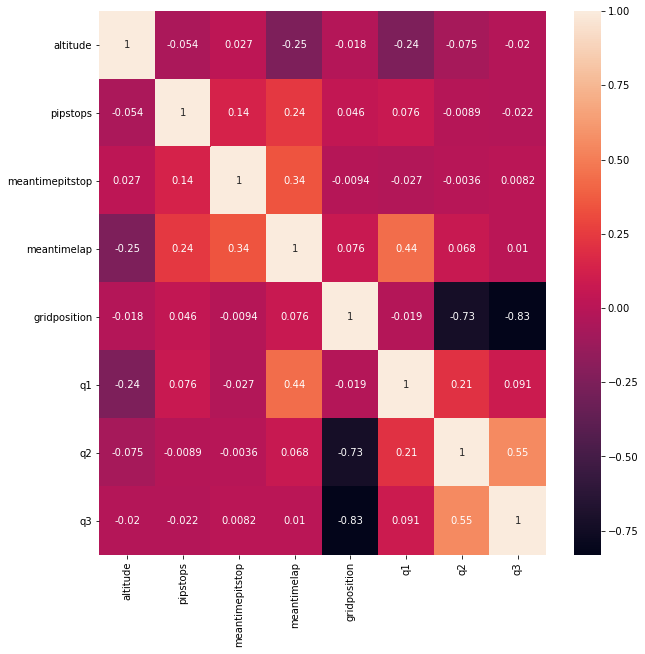

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
matriz_corr = train.toPandas()[['altitude','pipstops','meantimepitstop','meantimelap','gridposition','q1','q2', 'q3']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(matriz_corr,xticklabels=matriz_corr.columns,yticklabels=matriz_corr.columns,annot=True)

In [22]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoderEstimator
assemblerInputs = ["circuitId", "date", "time", "altitude", "pipstops", "meantimepitstop", "meantimelap", "gridposition", "q1", "q2", "q3"]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')
train = assembler.transform(train)
test = assembler.transform(test)
train.show()

+---------+----+----+--------+--------+------------------+------------------+------------+-------+-------+------+------------+--------------------+
|circuitId|date|time|altitude|pipstops|   meantimepitstop|       meantimelap|gridposition|     q1|     q2|    q3|raceposition|            features|
+---------+----+----+--------+--------+------------------+------------------+------------+-------+-------+------+------------+--------------------+
|        3| 4.0|15.0|       7|       2|           25.4305|        101.917375|          11| 95.451| 94.704|   0.0|           0|[3.0,4.0,15.0,7.0...|
|       32|10.0|19.0|    2227|       1|            23.755| 87.60718421052633|          13| 76.242| 77.167|   0.0|           0|[32.0,10.0,19.0,2...|
|       11| 8.0|13.0|     264|       2|           21.4345| 81.73702857142857|           1| 75.817| 75.573|74.572|           0|[11.0,8.0,13.0,26...|
|       12| 6.0|12.0|       4|       3|20.383666666666667|105.32322807017543|           2| 99.956| 98.058|97.163

In [23]:
test.show()

+---------+----+----+--------+--------+------------------+------------------+------------+-------+-------+-------+------------+--------------------+
|circuitId|date|time|altitude|pipstops|   meantimepitstop|       meantimelap|gridposition|     q1|     q2|     q3|raceposition|            features|
+---------+----+----+--------+--------+------------------+------------------+------------+-------+-------+-------+------------+--------------------+
|       71| 9.0|11.0|       2|       2|            30.161|108.17403773584905|          10| 93.919| 93.153| 93.008|           0|[71.0,9.0,11.0,2....|
|       24|12.0|13.0|       3|       1|            21.587|105.53856363636363|           2| 95.699| 95.527| 95.271|           0|[24.0,12.0,13.0,3...|
|        3|12.0|17.0|       7|       3|            26.618|            63.356|          20| 55.426|    0.0|    0.0|           0|[3.0,12.0,17.0,7....|
|       76| 9.0|13.0|     255|       5|          541.0034| 142.6626440677966|          15| 77.069| 77.254|

## Normalizamos los datasets de train y test

Realizamos la transformación "normalizer" la cual aplicamos a nuestro conjunto de train (entrenamiento) y test, esta transformacion se debe de aplicar a los dos conjuntos debido a que si realizamos un algoritmo con esta transoformacion debemos de tener tanto el train como el test normalizados, esos los tenemos a continuacion.

In [24]:
from pyspark.ml.feature import Normalizer
normalizer = Normalizer(inputCol="features", outputCol="normalizer_features", p=1.0) #NUESTRA COLUMNA DE ENTRADA SERA EL VERCTOR DEFINIDO ANTERIORMENTE COMO FEATURE, NUESTRO VECTOR NORMALIZADO Y P ES UN PARAMETRO DE NORMALIZACION DONDE LA NORMA ES 1
train_normalizer = normalizer.transform(train)
test_normalizer = normalizer.transform(test)

A continuacion podemos observar la columna feaures con los vectores y normalizer_features respectivamente normalizo:

In [25]:
train_normalizer.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition,features,normalizer_features
0,3,4.0,15.0,7,2,25.430500,101.917375,11,95.450996,94.704002,0.000000,0,"[3.0, 4.0, 15.0, 7.0, 2.0, 25.4305, 101.917375...","[0.008344856797561334, 0.01112647573008178, 0...."
1,32,10.0,19.0,2227,1,23.755000,87.607184,13,76.241997,77.167000,0.000000,0,"[32.0, 10.0, 19.0, 2227.0, 1.0, 23.755, 87.607...","[0.012467024812908787, 0.0038959452540339957, ..."
2,11,8.0,13.0,264,2,21.434500,81.737029,1,75.817001,75.572998,74.571999,0,"[11.0, 8.0, 13.0, 264.0, 2.0, 21.4345, 81.7370...","[0.01751220008950932, 0.012736145519643142, 0...."
3,12,6.0,12.0,4,3,20.383667,105.323228,2,99.956001,98.057999,97.163002,0,"[12.0, 6.0, 12.0, 4.0, 3.0, 20.383666666666667...","[0.026093542492725847, 0.013046771246362924, 0..."
4,32,10.0,19.0,2227,2,22.804000,86.657913,14,76.681999,77.183998,0.000000,0,"[32.0, 10.0, 19.0, 2227.0, 2.0, 22.804, 86.657...","[0.012464321316687055, 0.0038951004114647046, ..."


In [26]:
test_normalizer.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition,features,normalizer_features
0,71,9.0,11.0,2,2,30.161000,108.174038,10,93.918999,93.153000,93.008003,0,"[71.0, 9.0, 11.0, 2.0, 2.0, 30.161, 108.174037...","[0.13564761161381314, 0.017194767669356598, 0...."
1,24,12.0,13.0,3,1,21.587000,105.538564,2,95.698997,95.527000,95.271004,0,"[24.0, 12.0, 13.0, 3.0, 1.0, 21.587, 105.53856...","[0.051213923054343795, 0.025606961527171897, 0..."
2,3,12.0,17.0,7,3,26.618000,63.356000,20,55.425999,0.000000,0.000000,0,"[3.0, 12.0, 17.0, 7.0, 3.0, 26.618, 63.356, 20...","[0.01446480240588969, 0.05785920962355876, 0.0..."
3,76,9.0,13.0,255,5,541.003400,142.662644,15,77.069000,77.253998,0.000000,0,"[76.0, 9.0, 13.0, 255.0, 5.0, 541.0034, 142.66...","[0.06275861907659058, 0.007431941732754148, 0...."
4,70,7.0,13.0,678,3,21.154667,77.287169,20,65.757004,0.000000,0.000000,0,"[70.0, 7.0, 13.0, 678.0, 3.0, 21.1546666666666...","[0.07328317111357836, 0.007328317111357836, 0...."


## Aplicamos PCA

A continuacion, realizamos una transformación PCA, que nos permite reducir la dimensionalidad explicando la variabilidad de los datos, mediante la variable que vermos a continuación "model_pca.explainedVariance". Se debe saber que estas variables no son las iniciales, sino variables las cuales explican un x% de la variabilidad de los datos. Esta técnica es muy usada cuando tenemos muchas variables y queremos aplicar un modelo. 

In [27]:
from pyspark.ml.feature import PCA

pca = PCA(k=11, inputCol="features", outputCol='pca_features') # k, subconjunto de variables que queremos sacar dentro de nuestro caso, en el nuestro es 11 por lo que podemos ver cuantos nos aporta cada variable 
model_pca = pca.fit(train)  
train_pca = model_pca.transform(train) 
train_pca.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition,features,pca_features
0,3,4.0,15.0,7,2,25.430500,101.917375,11,95.450996,94.704002,0.000000,0,"[3.0, 4.0, 15.0, 7.0, 2.0, 25.4305, 101.917375...","[-4.259251528498681, -31.617022751505676, 65.5..."
1,32,10.0,19.0,2227,1,23.755000,87.607184,13,76.241997,77.167000,0.000000,0,"[32.0, 10.0, 19.0, 2227.0, 1.0, 23.755, 87.607...","[-2224.485911038125, -11.463482263152201, 70.0..."
2,11,8.0,13.0,264,2,21.434500,81.737029,1,75.817001,75.572998,74.571999,0,"[11.0, 8.0, 13.0, 264.0, 2.0, 21.4345, 81.7370...","[-261.67883990717394, -24.69394919004955, 111...."
3,12,6.0,12.0,4,3,20.383667,105.323228,2,99.956001,98.057999,97.163002,0,"[12.0, 6.0, 12.0, 4.0, 3.0, 20.383666666666667...","[-0.9570205750083413, -27.28751066644792, 142...."
4,32,10.0,19.0,2227,2,22.804000,86.657913,14,76.681999,77.183998,0.000000,0,"[32.0, 10.0, 19.0, 2227.0, 2.0, 22.804, 86.657...","[-2224.4852419295707, -10.454018728319605, 69...."


In [28]:
test_pca = model_pca.transform(test)
test_pca.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition,features,pca_features
0,71,9.0,11.0,2,2,30.161000,108.174038,10,93.918999,93.153000,93.008003,0,"[71.0, 9.0, 11.0, 2.0, 2.0, 30.161, 108.174037...","[0.25329924750124033, -37.79214588903415, 135...."
1,24,12.0,13.0,3,1,21.587000,105.538564,2,95.698997,95.527000,95.271004,0,"[24.0, 12.0, 13.0, 3.0, 1.0, 21.587, 105.53856...","[-0.17760069683375548, -28.623550781594695, 13..."
2,3,12.0,17.0,7,3,26.618000,63.356000,20,55.425999,0.000000,0.000000,0,"[3.0, 12.0, 17.0, 7.0, 3.0, 26.618, 63.356, 20...","[-5.962400836808676, -30.43225459853889, 1.350..."
3,76,9.0,13.0,255,5,541.003400,142.662644,15,77.069000,77.253998,0.000000,0,"[76.0, 9.0, 13.0, 255.0, 5.0, 541.0034, 142.66...","[-257.29323988908055, -547.4254150320168, 54.0..."
4,70,7.0,13.0,678,3,21.154667,77.287169,20,65.757004,0.000000,0.000000,0,"[70.0, 7.0, 13.0, 678.0, 3.0, 21.1546666666666...","[-677.1307113523318, -21.073657807437495, 7.58..."


Las trasnformaciones se deben de hacer por igual tanto al train como al test

In [29]:
model_pca.explainedVariance

DenseVector([0.8901, 0.0816, 0.0171, 0.0049, 0.0029, 0.0025, 0.0009, 0.0001, 0.0, 0.0, 0.0])

Dentro del PCA lo interesante es "model_pca.explainedVariance" lo que nos dice es la varianza explicada por cada una de las nuevas variables que se crean con el PCA.
La primera variable explica el 89% y la suma de todas es el 100%, pero podemos despreciar normalmnte cuando tengamos un 90 - 95% de la varianza, dependiendo del número de variables que tengamos que añadir al modelo.

Si quisieramos correr un modelo con PCA, lo correriamos con las 3 primeras variables, ya que con esas 3 tenemos explicado el 90%, y deberimaos de modificar la variable k explicada arriba y ponera un k=3

In [32]:
#pca = PCA(k=3, inputCol="features", outputCol='pca_features') # k=3, corremos el modelo con las 3 primeras variables
#model_pca = pca.fit(train)  
#train_pca = model_pca.transform(train) 
#test_pca = model_pca.transform(test)

# MODELOS: LogisticRegression,  RandomForest, Gradient Boosting

## LogisticRegression

In [33]:
def metrics(trainingSummary):

    # for multiclass, we can inspect metrics on a per-label basis

    print("Area under ROC: %s" % (trainingSummary.areaUnderROC))

    print("False positive rate by label:")
    for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print("True positive rate by label:")
    for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print("Precision by label:")
    for i, prec in enumerate(trainingSummary.precisionByLabel):
        print("label %d: %s" % (i, prec))

    print("Recall by label:")
    for i, rec in enumerate(trainingSummary.recallByLabel):
        print("label %d: %s" % (i, rec))

    print("F-measure by label:")
    for i, f in enumerate(trainingSummary.fMeasureByLabel()):
        print("label %d: %s" % (i, f))

    accuracy = trainingSummary.accuracy
    falsePositiveRate = trainingSummary.weightedFalsePositiveRate
    truePositiveRate = trainingSummary.weightedTruePositiveRate
    fMeasure = trainingSummary.weightedFMeasure()
    precision = trainingSummary.weightedPrecision
    recall = trainingSummary.weightedRecall
    print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
          % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

### Aplicamos un Logistic Regression Base Model y mostramos las metricas anteriores

In [34]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LogisticRegression(labelCol="raceposition", featuresCol="features")

# Entrenamos el modelo con train
lrModel = lr.fit(train)

# Resumen de modelo
trainingSummary = lrModel.summary
metrics(trainingSummary)

Area under ROC: 0.9483165786897749
False positive rate by label:
label 0: 0.824468085106383
label 1: 0.0059271803556308214
True positive rate by label:
label 0: 0.9940728196443692
label 1: 0.17553191489361702
Precision by label:
label 0: 0.9578460701658961
label 1: 0.6111111111111112
Recall by label:
label 0: 0.9940728196443692
label 1: 0.17553191489361702
F-measure by label:
label 0: 0.9756232686980609
label 1: 0.27272727272727276
Accuracy: 0.9528276601447333
FPR: 0.7832229256067472
TPR: 0.9528276601447333
F-measure: 0.9402052983837997
Precision: 0.9403745686107366
Recall: 0.9528276601447333


In [35]:
lrModel.extractParamMap()

{Param(parent='LogisticRegression_463990c5f76a8988c142', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2)'): 2,
 Param(parent='LogisticRegression_463990c5f76a8988c142', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty'): 0.0,
 Param(parent='LogisticRegression_463990c5f76a8988c142', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial.'): 'auto',
 Param(parent='LogisticRegression_463990c5f76a8988c142', name='featuresCol', doc='features column name'): 'features',
 Param(parent='LogisticRegression_463990c5f76a8988c142', name='fitIntercept', doc='whether to fit an intercept term'): True,
 Param(parent='LogisticRegression_463990c5f76a8988c142', name='labelCol', doc='label column name'): 'raceposition',
 Param(parent='LogisticRegression_463990c5f76a8988c142

In [36]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = lrModel.transform(test)

# Evaluamos el modelo
evaluator = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator.getMetricName()) + ' en test: ' + str(evaluator.evaluate(predictions)))

areaUnderROC en test: 0.9224960254372021


Nuestra área bajo la cruva ROC del modelo de Regresión lineal es del 92%

### Aplicamos un Logistic Regresion Base Model con las variables normalizadas y mostramos las metricas anteriores

A continuacion aplicaremos el mismo modelo de regresion lineal pero con las variables normalizadas, con nuestro parametro normalizer_features:

In [37]:
lr = LogisticRegression(labelCol="raceposition", featuresCol="normalizer_features") # Creamos el mismo modelo, un lr LogisticReresion, la labelCol es la raceposition pero el featuresCol deesmo poner nuestra normalizer_features 

# Entrenamos nuestro modelo con las train normalizadas, parametro que hemos obtenido anteriormente
lrModel_normalizer = lr.fit(train_normalizer)

# Summary
trainingSummary = lrModel_normalizer.summary
metrics(trainingSummary)

Area under ROC: 0.9416777763765528
False positive rate by label:
label 0: 0.8031914893617021
label 1: 0.007056167090036692
True positive rate by label:
label 0: 0.9929438329099634
label 1: 0.19680851063829788
Precision by label:
label 0: 0.9588443717634233
label 1: 0.5967741935483871
Recall by label:
label 0: 0.9929438329099634
label 1: 0.19680851063829788
F-measure by label:
label 0: 0.9755962285080421
label 1: 0.29600000000000004
Accuracy: 0.9528276601447333
FPR: 0.7630753165964722
TPR: 0.9528276601447333
F-measure: 0.9413523016896256
Precision: 0.9406001494357827
Recall: 0.9528276601447333


Obtenemos un área under ROC en el train de un 94%!

In [38]:
predictions = lrModel_normalizer.transform(test_normalizer)

# Evaluamos el modelo
evaluator = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator.getMetricName()) + ' en test: ' + str(evaluator.evaluate(predictions)))

areaUnderROC en test: 0.9085850556438794


Nuestra área bajo la cruva ROC del modelo de Regresión lineal es del 90% bajo las predicciones, hemos perdido un 2% respecto a aplicar las variables sin normalizar. Ganamos en el train pero en test no estamos ganando, es una mala señal, esta teniendo overfitting, sobreajuste.

### Aplicamos un Logistic Regresion Base Model con las variables sacadas de pca y mostramos las metricas anteriores

A continuacion aplicaremos el mismo modelo de regresion lineal pero con PCA, con nuestro parametro pca_features :

In [39]:
lr = LogisticRegression(labelCol="raceposition", featuresCol="pca_features")

# Entrenamos nuestro modelo con las train_pca
lrModel_pca = lr.fit(train_pca)

#Summary
trainingSummary = lrModel_pca.summary
metrics(trainingSummary)

Area under ROC: 0.9483165786897747
False positive rate by label:
label 0: 0.824468085106383
label 1: 0.0059271803556308214
True positive rate by label:
label 0: 0.9940728196443692
label 1: 0.17553191489361702
Precision by label:
label 0: 0.9578460701658961
label 1: 0.6111111111111112
Recall by label:
label 0: 0.9940728196443692
label 1: 0.17553191489361702
F-measure by label:
label 0: 0.9756232686980609
label 1: 0.27272727272727276
Accuracy: 0.9528276601447333
FPR: 0.7832229256067472
TPR: 0.9528276601447333
F-measure: 0.9402052983837997
Precision: 0.9403745686107366
Recall: 0.9528276601447333


Obtenemos un Area under ROC: 0.948316578689775 que esta muy bien en train, pero 

In [40]:
predictions = lrModel_pca.transform(test_pca)

# Evaluamos
evaluator = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator.getMetricName()) + ' en test: ' + str(evaluator.evaluate(predictions)))

areaUnderROC en test: 0.922496025437202


Evaluamos con respecto al test "que no ha visto" y el modelo con trasformacion PCA y obtenemos un area under ROC del 92%, respecto a emplear un modelo normalizado hemos ganado un 2% pero respecto a utilizar el modelo en si es el mismo y es porque hemos trabajado con todas la variables, es donde juega el k del PCA.


#### PCA con 9 variables

In [41]:
pca = PCA(k=9, inputCol="features", outputCol='pca_features')
model_pca = pca.fit(train)
train_pca = model_pca.transform(train)
train_pca.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition,features,pca_features
0,3,4.0,15.0,7,2,25.430500,101.917375,11,95.450996,94.704002,0.000000,0,"[3.0, 4.0, 15.0, 7.0, 2.0, 25.4305, 101.917375...","[-4.259251528498668, -31.61702275150565, 65.57..."
1,32,10.0,19.0,2227,1,23.755000,87.607184,13,76.241997,77.167000,0.000000,0,"[32.0, 10.0, 19.0, 2227.0, 1.0, 23.755, 87.607...","[-2224.485911038124, -11.463482263152057, 70.0..."
2,11,8.0,13.0,264,2,21.434500,81.737029,1,75.817001,75.572998,74.571999,0,"[11.0, 8.0, 13.0, 264.0, 2.0, 21.4345, 81.7370...","[-261.6788399071739, -24.693949190049523, 111...."
3,12,6.0,12.0,4,3,20.383667,105.323228,2,99.956001,98.057999,97.163002,0,"[12.0, 6.0, 12.0, 4.0, 3.0, 20.383666666666667...","[-0.957020575008326, -27.287510666447897, 142...."
4,32,10.0,19.0,2227,2,22.804000,86.657913,14,76.681999,77.183998,0.000000,0,"[32.0, 10.0, 19.0, 2227.0, 2.0, 22.804, 86.657...","[-2224.48524192957, -10.454018728319456, 69.92..."


In [42]:
test_pca = model_pca.transform(test)
test_pca.toPandas().head()

,circuitId,date,time,altitude,pipstops,meantimepitstop,meantimelap,gridposition,q1,q2,q3,raceposition,features,pca_features
0,71,9.0,11.0,2,2,30.161000,108.174038,10,93.918999,93.153000,93.008003,0,"[71.0, 9.0, 11.0, 2.0, 2.0, 30.161, 108.174037...","[0.2532992475012744, -37.79214588903412, 135.5..."
1,24,12.0,13.0,3,1,21.587000,105.538564,2,95.698997,95.527000,95.271004,0,"[24.0, 12.0, 13.0, 3.0, 1.0, 21.587, 105.53856...","[-0.17760069683373597, -28.623550781594673, 13..."
2,3,12.0,17.0,7,3,26.618000,63.356000,20,55.425999,0.000000,0.000000,0,"[3.0, 12.0, 17.0, 7.0, 3.0, 26.618, 63.356, 20...","[-5.962400836808667, -30.43225459853888, 1.350..."
3,76,9.0,13.0,255,5,541.003400,142.662644,15,77.069000,77.253998,0.000000,0,"[76.0, 9.0, 13.0, 255.0, 5.0, 541.0034, 142.66...","[-257.29323988908044, -547.4254150320169, 54.0..."
4,70,7.0,13.0,678,3,21.154667,77.287169,20,65.757004,0.000000,0.000000,0,"[70.0, 7.0, 13.0, 678.0, 3.0, 21.1546666666666...","[-677.1307113523316, -21.07365780743743, 7.586..."


In [43]:
lr = LogisticRegression(labelCol="raceposition", featuresCol="pca_features")

# Entrenamos el modelo con train_pca
lrModel_pca = lr.fit(train_pca)

#Summary
trainingSummary = lrModel_pca.summary
metrics(trainingSummary)

Area under ROC: 0.9475358963734299
False positive rate by label:
label 0: 0.8191489361702128
label 1: 0.009314140558848433
True positive rate by label:
label 0: 0.9906858594411516
label 1: 0.18085106382978725
Precision by label:
label 0: 0.9579694323144105
label 1: 0.5074626865671642
Recall by label:
label 0: 0.9906858594411516
label 1: 0.18085106382978725
F-measure by label:
label 0: 0.9740530040238657
label 1: 0.26666666666666666
Accuracy: 0.9498793889037791
FPR: 0.7783424656328404
TPR: 0.9498793889037792
F-measure: 0.9384087715330715
Precision: 0.935269011998012
Recall: 0.9498793889037792


In [44]:
predictions = lrModel_pca.transform(test_pca)

# Evaluamos el modelo 
evaluator = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator.getMetricName()) + ' en test: ' + str(evaluator.evaluate(predictions)))

areaUnderROC en test: 0.9205087440381559


Con 11 variables nuestra área under ROC era de 92,24 y con 9 es 92,05; estamos perdiendo un 0,20% de precision reduciendo 3. Es una eleccion entre la precisión que estamos dispuestos a perder, las variables que estamos dispuestos a meter y el tiempo de ejecución.

## RandomForest - Clasificación

Vamos aplicar el modelo de RandomForest, lo hemos aplicado con los árboles por defecto, el cual es 20 (lo podemos observar en el API). El algoritmo es paralelizable lo que implica que es más "rápido"

In [52]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier() \
        .setFeaturesCol("features") \ # En el caso que quisieramos aplicar el modelo con la transformación de pca o normalizer, devemos de poner la variable correspondiente en features
        .setLabelCol("raceposition") \ #Debemos de meter este parametro, al seleccionar aleatoriamente variables y registros siempre empezamos por lo mismo por lo que empezamos por lo mismo, si no ponemos semillas cada vez coge unas variables y unos registros, por lo que dependiendo de la colocacion nos podrian dar resultados diferentes 
        .setSeed(100)

rfModel = rf.fit(train) # En el caso que quisieramos aplicar el modelo con la transformación de pca o normalizer, devemos de poner la variable correspondiente en train_xx
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = lrModel_pca.summary
metrics(trainingSummary)

SyntaxError: unexpected character after line continuation character (<ipython-input-52-455302d2f039>, line 4)

In [53]:
predictions = rfModel.transform(test) # En el caso que quisieramos aplicar el modelo con la transformación de pca o normalizer, devemos de poner la variable correspondiente en test_xx

# Evaluamos el modelo
evaluator = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator.getMetricName()) + ' en test: ' + str(evaluator.evaluate(predictions)))

NameError: name 'rfModel' is not defined

Viendo la areaUnderROC de test, podemos comprobar que el RandomForest base de 20 árboles se está comportando peor que el LogisticRegression, si aumentamos el número de árboles de este el resultado a esperar seria mejor. Podriamos aumentar a 80 árboles.

Este algoritmo con este resultado no quiere decir que sea peor que el de Regresión Logistica, sino que el algoritmo base con 20 árboles clasifica peor, pero este algoritmo es más usado que el de LR y llega a clasificar mejor.

In [ ]:
# DE LA SIGUIENTE FORMA PODREMOS VER EL RESULTADO DEL RANDOMFOREST CLASSIFIER CON 80 ÁRBOLES
""""
rf2 = RandomForestClassifier() \
        .setFeaturesCol("features") \ 
        .setLabelCol("raceposition") \
        .setnumTrees=80 \ # Modificamos el valor por defecto de los árboles a 80.
        .setSeed(100)  

rfModel2 = rf2.fit(train) 
predictions2 = rfModel2.transform(test) 

# Evaluamos el modelo
evaluator2 = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator2.getMetricName()) + ' on test: ' + str(evaluator2.evaluate(predictions2)))

""""

In [46]:
rfModel.extractParamMap() # Parametros con los que se ha entrenado el modelo.

{Param(parent='RandomForestClassifier_4517a0a961b05ac52e92', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): False,
 Param(parent='RandomForestClassifier_4517a0a961b05ac52e92', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 10,
 Param(parent='RandomForestClassifier_4517a0a961b05ac52e92', name='featureSubsetStrategy', doc='The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n].'): 'auto',
 Param(parent='RandomForestClassifier_4517a0a961b05ac52e92', name='featuresCol', doc='features column name'): 'features',
 Param(parent='Random

In [47]:
print(rfModel.explainParams()) # De esta manera podemos ver la explicacion de cada parámetro del modelo.

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n]. (default: auto)
featuresCol: features column name (default: features, current: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)
labelCol: label column name (default: label, current: raceposition)
maxBins: Max number of bins for discretizing continuous features.  Must be 

Los modelos de árbol tambien se emplean para reducir las dimesiones, al igual que hemos hecho con el PCA:

In [48]:
rfModel.featureImportances

SparseVector(11, {0: 0.0309, 1: 0.0144, 2: 0.0096, 3: 0.0203, 4: 0.0356, 5: 0.046, 6: 0.023, 7: 0.6458, 8: 0.0196, 9: 0.0391, 10: 0.1156})

Aqui podemos ver la "importancia" de cada una de las variables, podemos ver que ninguna variable es demasiado importante e excepción de la septima que si lo es, por lo que podriamos afinar el modelo de RandomForest quedandonos con la variable 7, 5 y 4 por ejemplo. Deberiamos volver a entrenar y evaluar el modelo con un nuevo vector features con esas variables.

In [49]:
print(rfModel.toDebugString) # De esta manera podemos ver lo árboles que hemos empoleado con sus pesos, por defecto cada árbol tiene peso uno. 

RandomForestClassificationModel (uid=RandomForestClassifier_4517a0a961b05ac52e92) with 20 trees
  Tree 0 (weight 1.0):
    If (feature 7 <= 2.5)
     If (feature 1 <= 8.5)
      If (feature 7 <= 1.5)
       If (feature 4 <= 1.5)
        If (feature 1 <= 4.5)
         Predict: 0.0
        Else (feature 1 > 4.5)
         Predict: 1.0
       Else (feature 4 > 1.5)
        If (feature 8 <= 77.90950012207031)
         Predict: 0.0
        Else (feature 8 > 77.90950012207031)
         Predict: 0.0
      Else (feature 7 > 1.5)
       If (feature 5 <= 26.3105)
        If (feature 5 <= 24.164250000000003)
         Predict: 0.0
        Else (feature 5 > 24.164250000000003)
         Predict: 0.0
       Else (feature 5 > 26.3105)
        If (feature 4 <= 1.5)
         Predict: 0.0
        Else (feature 4 > 1.5)
         Predict: 0.0
     Else (feature 1 > 8.5)
      If (feature 5 <= 22.715249999999997)
       If (feature 5 <= 22.3205)
        If (feature 8 <= 102.29500198364258)
         Predict: 

## Gradient Boosting - Clasificación

Este algoritmo no es paralelizable, opera de forma diferente al RandomForest. Este selecciona n variables y todos los registros, y crea un árbol de decisión, una vez tenemos el primer árbol seleciona las muestras que se han clasificado mal y construye un segundo con los registros iniciales que ha clasificado mal e intenta clasificarlos bien y así sucesivamente.

La estructura de este modelo es similar al del modelo anterior, el Random Forest

In [54]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol="raceposition", featuresCol="features")

gbtModel = gbt.fit(train)

In [51]:
predictions = gbtModel.transform(test)

# Evaluamos
evaluator = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator.getMetricName()) + ' en test: ' + str(evaluator.evaluate(predictions)))

areaUnderROC on test: 0.8525437201907788


In [52]:
gbtModel.extractParamMap() 

{Param(parent='GBTClassifier_465f94a161937b91fb3c', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): False,
 Param(parent='GBTClassifier_465f94a161937b91fb3c', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 10,
 Param(parent='GBTClassifier_465f94a161937b91fb3c', name='featuresCol', doc='features column name'): 'features',
 Param(parent='GBTClassifier_465f94a161937b91fb3c', name='labelCol', doc='label column name'): 'raceposition',
 Param(parent='GBTClassifier_465f94a161937b91fb3c', name='lossType', doc='Loss function which GBT tries to minimize (case-insensitive). Supported options: logistic'): 'logistic',


In [53]:
print(gbtModel.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n]. (undefined)
featuresCol: features column name (default: features, current: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (undefined)
labelCol: label column name (default: label, current: raceposition)
lossType: Loss function which GBT tries to minimize (case-insensitive). Supported o

En este modelo tambien podemos observar la importancia de las varibales como en el RF de a siguiente manera:

In [54]:
gbtModel.featureImportances

SparseVector(11, {0: 0.0534, 1: 0.0386, 2: 0.0143, 3: 0.0187, 4: 0.0676, 5: 0.1528, 6: 0.1188, 7: 0.3341, 8: 0.0716, 9: 0.0819, 10: 0.0483})

Aqui en el GB, podemos observar que la importancia de las variables osn diferentes al del RF, ya que la nº 7 también destaca sobre las demás pero en este algoritmo en menor magnitud (que aun así sigue destacando bastante esta)

In [55]:
print(gbtModel.toDebugString) # Observamos los árboles que se han empleado

GBTClassificationModel (uid=GBTClassifier_465f94a161937b91fb3c) with 20 trees
  Tree 0 (weight 1.0):
    If (feature 7 <= 2.5)
     If (feature 7 <= 1.5)
      If (feature 4 <= 1.5)
       If (feature 0 <= 2.5)
        If (feature 5 <= 21.899749999999997)
         Predict: -1.0
        Else (feature 5 > 21.899749999999997)
         Predict: -0.3333333333333333
       Else (feature 0 > 2.5)
        If (feature 6 <= 114.63898181818182)
         Predict: 0.45454545454545453
        Else (feature 6 > 114.63898181818182)
         Predict: -0.5
      Else (feature 4 > 1.5)
       If (feature 10 <= 101.68949890136719)
        If (feature 5 <= 24.164250000000003)
         Predict: -0.02857142857142857
        Else (feature 5 > 24.164250000000003)
         Predict: -0.5714285714285714
       Else (feature 10 > 101.68949890136719)
        If (feature 10 <= 106.89899826049805)
         Predict: 1.0
        Else (feature 10 > 106.89899826049805)
         Predict: 0.0
     Else (feature 7 > 1.5)
  

# Conclusión 

Hemos realizado tres modelos los cuales son:

Regresión Lineal: 
 - Primer modelo de regresion linal: En el entrenamineto nuestra areaUnderROC = 94,83% y al testear el modelo areaUnderROC = 92,24
 - Modelo normalizado: En el entrenamineto nuestra areaUnderROC = 94,16  y al testear el modelo areaUnderROC = 90,85
 - Modelo PCA version-2 (9 variables): En el entrenamineto nuestra areaUnderROC =  94,75% y al testear el modelo areaUnderROC = 92,05%
 
El modelo de regresion lineal presenta unos buenos resultados, como he comentando arriba la seleccion de las transformaciones en nuestro caso no es algo que presente gran relevancia ya que podemos trabajar los datos perfectamente, pero si que es una herramienta esencial en muchos otros casos donde la dimensionalidad de los datos es abrumandora. 

Además podemos ver como se esta produciendo overfitting debido a la diferencia de la curva ROC entre los resultados de entrenamiento y de test.
 
Random Forest:
 - El Random Forest presenta un areaUnderROC = 88,65%, comparando el resultado con los resultados obtenidos en los tres modelos de Regresión Lineal es un número bajo pero este es uno de los principales algortmos mas empleados, por lo que creemos que si modificamos el número de árboles empleado (en este resultado hemos empleado el número base que son 20) entre 80 y 100 podemos llegar a obtener los mismos resultados o mejores. 
 Además este algorimo nos permite ver la importancia de las feature, lo cual se asemeja bastante a la informacion que podemos llegar a tener mediante el PCA

Gradient Boosting:
 - El resultado del algoritmo es areaUnderROC = 85,25%, este algoritmo también presenta la misma funcionalidad que el RF, y es que también podemos ver la importacia que presentan las features. 
 


Sabiendo esto, desde nuestra opinión creemos que el mejor algoritmo que hemos empleado ha sido el Random Forest, aunque nuestro resultado no ha sido el mejor. Creemos que es un algoritmo que presenta un amplio número de funcionalidades, una gran versatilidad, gracias a la opcion de seleccionar el número de árboles que queremos emplear y con la informacion que presenta el .featureImportances, además de su funcinamiento intrinseco ya que este es paralelizable. Por lo tanto puedes seleccionar en funcion de tus intereses, número de variables empleadas y la precisión, que finalmente se traduce en tiempo de ejecución.

# Cross Validation - ParamGrid

## Con evaluador y CV=5

Suponemos que hemos elegido de los modelos anteriores el modelo Logistic Regression, una vez lo tenemos seleccionado lo que realizaremos es meter distintos conjuntos de valores a los parametros del nuestro modelo seleecionado y ver con que valores se ajusta mejor. Para poder realizar esto, debemos de hacer uso del ParamGridBuilder y lo que hacemos es para cada valor de cada parametro le añadimos un Grid, el Grid final es la combinacion de todos entre si, en nuestro caso seria como tener ocho modelos ( 2 x 2 x 2 ).

Los valores de regParam y elasaticNetParam, son parametros de regularización/penalización para Regresión Lineal, estos valores cuanto menor valor tengan mejor funcionara el modelo. Si estuvieramos trabajando con los algoritmos de arboles, usariamos los parametros deep y numTrees.

CV = 5, separamos el conjunto de datos en cinco partes iguales, una de ellas será para test y el resto para entrenamiento.

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator() \
                .setLabelCol("raceposition") \
                .setRawPredictionCol("rawPrediction")

print("We are using metric: " + evaluator.getMetricName())

lr = LogisticRegression(labelCol="raceposition", featuresCol="features")

# Creamos ParamGrid para Cross Validation

paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5]) # entre 0 y 1 
             .addGrid(lr.elasticNetParam, [0.0, 0.5]) # entre 0 y 1 
             .addGrid(lr.maxIter, [30, 100]) # Máximo de iteraciones que tiene que dar el modelo a la hora de predecir
             .build())

# Creamos 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Ejecutamos cross validations
cvModel = cv.fit(train)

cvModel.avgMetrics

Ahora queremos selecionar el mejor modelo, lo cual lo podemos realizar de la siguiente forma:

In [58]:
trainingSummary = cvModel.bestModel.summary # Creamos una variable que es igual al nombre del modelo .bestModel y .summary
metrics(trainingSummary) # Imprimimos la variable creada anteriormente

Area under ROC: 0.9481199067985419
False positive rate by label:
label 0: 1.0
label 1: 0.0
True positive rate by label:
label 0: 1.0
label 1: 0.0
Precision by label:
label 0: 0.9496113642455106
label 1: 0.0
Recall by label:
label 0: 1.0
label 1: 0.0
F-measure by label:
label 0: 0.9741545229584823
label 1: 0.0
Accuracy: 0.9496113642455106
FPR: 0.9496113642455106
TPR: 0.9496113642455106
F-measure: 0.9250682055325389
Precision: 0.9017617431042199
Recall: 0.9496113642455106


Podemos observar que el mejor modelo que hemos creado mediane el algoritmo de LR, nos genera una área bajo la curva ROC del 94,81% EN TRAINING

Para poder conocer los parámetros con los cuales hemos creado/realizado el mejor modelo, creamos la siguiente sentencia:

In [59]:
cvModel.bestModel.extractParamMap() # Llamamos al modelo, .besModel y metodo .extractParamMap()

{Param(parent='LogisticRegression_4966b65abb3f60d39fa6', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2)'): 2,
 Param(parent='LogisticRegression_4966b65abb3f60d39fa6', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty'): 0.5,
 Param(parent='LogisticRegression_4966b65abb3f60d39fa6', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial.'): 'auto',
 Param(parent='LogisticRegression_4966b65abb3f60d39fa6', name='featuresCol', doc='features column name'): 'features',
 Param(parent='LogisticRegression_4966b65abb3f60d39fa6', name='fitIntercept', doc='whether to fit an intercept term'): True,
 Param(parent='LogisticRegression_4966b65abb3f60d39fa6', name='labelCol', doc='label column name'): 'raceposition',
 Param(parent='LogisticRegression_4966b65abb3f60d39fa6

In [62]:
predictions = cvModel.bestModel.transform(test)

# Evaluamos el modelo
evaluator = BinaryClassificationEvaluator(labelCol="raceposition", rawPredictionCol="rawPrediction")
print(str(evaluator.getMetricName()) + ' en test: ' + str(evaluator.evaluate(predictions)))

areaUnderROC on test: 0.9227941176470588


El área under ROC del mejor modelo es del 92,27%, este ha sido el mejor resultado que hemos obtenido gracias al paramGrid, que es un resultado ligeramente mejor que el que hemos obtenido anteriormente con este mismo algoritmo, que era de 92,24%

Andrés Porta y Miguel Moreno